In [47]:
import pandas as pd

#import natural language toolkit
import nltk

# get lexicon we'll be working with today
nltk.download('vader_lexicon') 

## import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\buddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
allSchools = pd.read_csv('allSchools.csv')

In [49]:
# To fix the lookup error produced by this cell
nltk.download('punkt')

# Provided code from lecture
allSchools['token'] = allSchools['content'].apply(word_tokenize) 

allSchools.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\buddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,school,date,content,word_count,state,month,token
0,Florida State University,28-Feb-2020,"Dear FSU Family,\n\nFlorida State University c...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students,\n\nI want to...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre..."


In [50]:
# To fix the lookup error produced by this cell
nltk.download('stopwords')

# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{"isn't", 'other', 'in', 'aren', 'is', 'any', 'll', 'hadn', 'while', 'been', "mightn't", 'where', 'doing', 'just', 'and', 'yourself', 'your', 'themselves', 'here', 'most', 'such', 'we', 'does', 'mightn', 'they', "couldn't", 'having', 'couldn', 'of', 'being', 'with', 'what', 'against', "shan't", 'shouldn', 'their', 'have', 'if', 'out', 'i', 'over', 'up', 'under', 'each', 'were', 'herself', 'no', 'should', 'until', "hasn't", 'm', 'my', 'nor', 'which', 'now', 'yours', "won't", 'myself', 'had', 'or', 'both', 'more', 'did', 'very', 'mustn', 'on', "didn't", "hadn't", 'there', 'the', "mustn't", 'are', 'theirs', 'than', "you're", "she's", "should've", 'he', 'wasn', 'an', 'himself', 'some', 'further', 'it', "weren't", 'how', 'into', 's', "don't", 'yourselves', 'haven', 'shan', 'whom', 'will', 'o', 've', 'who', 'ma', 'down', 'few', "you'd", 'during', 'you', 'doesn', 'she', 'his', 'our', 'when', 'y', 'for', 'by', 'its', 'these', 'not', 'wouldn', "haven't", "wouldn't", 'because', "wasn't", 'hasn',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\buddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# remove stop words
allSchools['stop'] = allSchools['token'].apply(lambda x: [item for item in x if item not in stop_words])
allSchools.head()

,school,date,content,word_count,state,month,token,stop
0,Florida State University,28-Feb-2020,"Dear FSU Family,\n\nFlorida State University c...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers...","[Dear, FSU, Family, ,, Florida, State, Univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ...","[This, message, faculty, staff, approved, Kyle..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,...","[The, spring, semester, programs, Florida, Sta..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students,\n\nI want to...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,...","[Dear, Faculty, ,, Staff, Students, ,, I, want..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre...","[Florida, State, University, taking, aggressiv..."


In [52]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [53]:
allSchools['stem'] = allSchools['stop'].apply(lambda x: [ps.stem(y) for y in x])
allSchools.head()

,school,date,content,word_count,state,month,token,stop,stem
0,Florida State University,28-Feb-2020,"Dear FSU Family,\n\nFlorida State University c...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers...","[Dear, FSU, Family, ,, Florida, State, Univers...","[dear, fsu, famili, ,, florida, state, univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ...","[This, message, faculty, staff, approved, Kyle...","[thi, messag, faculti, staff, approv, kyle, cl..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,...","[The, spring, semester, programs, Florida, Sta...","[the, spring, semest, program, florida, state,..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students,\n\nI want to...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,...","[Dear, Faculty, ,, Staff, Students, ,, I, want...","[dear, faculti, ,, staff, student, ,, I, want,..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre...","[Florida, State, University, taking, aggressiv...","[florida, state, univers, take, aggress, step,..."


In [54]:
# get series of all words after stemming
stem_allSchools = allSchools['stem'].apply(pd.Series).stack()

In [55]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_allSchools = FreqDist(stem_allSchools)


# remove punctuation counts
for punc in string.punctuation:
    del fdist_allSchools[punc]

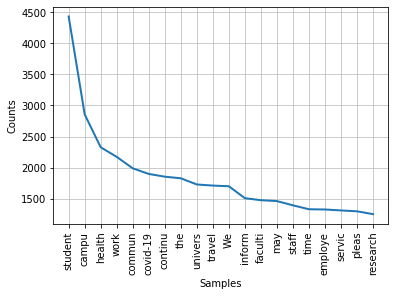

In [56]:
# Frequency Distribution Plot - top 20

# for words in what students like most
fdist_allSchools.plot(20, cumulative=False)

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [58]:
# Some text taken from UC Santa Cruz's first COVID-19 update
analyser.polarity_scores(""""We know that many of you are concerned about the recent appearance of the coronavirus. 
                         Although there have been no confirmed cases on campus, we want to provide you with some 
                         information about how to protect your health.""")

{'neg': 0.054, 'neu': 0.852, 'pos': 0.095, 'compound': 0.1779}

In [59]:
# get list of the 'sentences' (responses) from each individual
allSchools_list = list(allSchools['content'].values)

In [60]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [61]:
# get sentiment measures
allSchools_sentiments = get_sentiments(allSchools_list)

In [62]:
allSchools_sentiments.head()

,compound,neg,neu,pos,sentence
0,0.9751,0.070,0.822,0.108,"Dear FSU Family,\n\nFlorida State University c..."
1,0.5994,0.027,0.919,0.054,This message to all faculty and staff has been...
2,0.2023,0.025,0.946,0.030,The spring semester programs at Florida State ...
3,0.8658,0.050,0.865,0.086,"Dear Faculty, Staff and Students,\n\nI want to..."
4,-0.9461,0.117,0.797,0.086,Florida State University is taking aggressive ...


In [63]:
allSchools_sentiments.describe()

,compound,neg,neu,pos
count,899.000000,899.000000,899.000000,899.000000
mean,0.748310,0.035892,0.857274,0.106801
std,0.503932,0.030020,0.054778,0.048610
min,-0.999100,0.000000,0.530000,0.000000
25%,0.870450,0.016000,0.823500,0.075000
50%,0.976900,0.030000,0.857000,0.106000
75%,0.993350,0.049500,0.891000,0.137000
max,0.999900,0.272000,1.000000,0.362000


In [66]:
allShools_sent = allSchools.drop(['token', 'stop'], axis = 1)\
.assign(pos = allSchools_sentiments['pos'])\
.assign(neg = allSchools_sentiments['neg'])\
.assign(neu = allSchools_sentiments['neu'])\
.assign(compound = allSchools_sentiments['compound'])

In [73]:
allShools_sent.head()

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,"Dear FSU Family,\n\nFlorida State University c...",615,fl,2,"[dear, fsu, famili, ,, florida, state, univers...",0.108,0.070,0.822,0.9751
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[thi, messag, faculti, staff, approv, kyle, cl...",0.054,0.027,0.919,0.5994
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[the, spring, semest, program, florida, state,...",0.030,0.025,0.946,0.2023
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students,\n\nI want to...",256,fl,3,"[dear, faculti, ,, staff, student, ,, I, want,...",0.086,0.050,0.865,0.8658
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[florida, state, univers, take, aggress, step,...",0.086,0.117,0.797,-0.9461


In [70]:
allShools_sent.to_csv('allShools_sent.csv', index = False)

In [74]:
# pd.read_csv('allShools_sent.csv').head()

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,"Dear FSU Family,\n\nFlorida State University c...",615,fl,2,"['dear', 'fsu', 'famili', ',', 'florida', 'sta...",0.108,0.070,0.822,0.9751
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"['thi', 'messag', 'faculti', 'staff', 'approv'...",0.054,0.027,0.919,0.5994
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"['the', 'spring', 'semest', 'program', 'florid...",0.030,0.025,0.946,0.2023
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students,\n\nI want to...",256,fl,3,"['dear', 'faculti', ',', 'staff', 'student', '...",0.086,0.050,0.865,0.8658
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"['florida', 'state', 'univers', 'take', 'aggre...",0.086,0.117,0.797,-0.9461
